<a href="https://colab.research.google.com/github/codini16/Coding-School-Fraud-Project/blob/main/Coding_School_Project_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Dataset

# Loading Data and Converting Into DataFrame

In [ ]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# convert data to dataframe

file_path = '/content/drive/MyDrive/Coding School Fraud Dataset/synthetic_fraud_dataset.csv'
fraud_df = pd.read_csv(file_path)
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [ ]:
fraud_df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

# EDA

In [ ]:
# checking correlation of variables
correlation_subset = fraud_df[['Fraud_Label', 'Risk_Score', 'Failed_Transaction_Count_7d', 'Previous_Fraudulent_Activity', 'Transaction_Distance', 'Transaction_Amount', 'Account_Balance', 'IP_Address_Flag', 'Daily_Transaction_Count', 'Card_Age', 'Is_Weekend']]
correlation_subset.corr()

,Fraud_Label,Risk_Score,Failed_Transaction_Count_7d,Previous_Fraudulent_Activity,Transaction_Distance,Transaction_Amount,Account_Balance,IP_Address_Flag,Daily_Transaction_Count,Card_Age,Is_Weekend
Fraud_Label,1.000000,0.385810,0.509871,-0.000718,-0.000116,0.001901,-0.003153,0.003028,-0.007065,-0.003120,0.000064
Risk_Score,0.385810,1.000000,0.000814,-0.002815,-0.001902,0.005606,-0.005262,-0.004064,-0.007572,-0.001385,-0.005236
Failed_Transaction_Count_7d,0.509871,0.000814,1.000000,-0.000352,-0.006997,0.001247,-0.000186,0.010370,-0.007820,-0.004570,-0.003335
Previous_Fraudulent_Activity,-0.000718,-0.002815,-0.000352,1.000000,0.005740,0.001668,-0.002314,-0.008298,0.000492,-0.006713,-0.000473
Transaction_Distance,-0.000116,-0.001902,-0.006997,0.005740,1.000000,0.007935,0.001748,-0.003941,-0.001842,-0.003339,-0.010592
Transaction_Amount,0.001901,0.005606,0.001247,0.001668,0.007935,1.000000,-0.002380,-0.001620,0.002149,0.002294,0.001348
Account_Balance,-0.003153,-0.005262,-0.000186,-0.002314,0.001748,-0.002380,1.000000,-0.001210,0.006041,0.000717,0.000557
IP_Address_Flag,0.003028,-0.004064,0.010370,-0.008298,-0.003941,-0.001620,-0.001210,1.000000,0.001815,-0.003143,0.004979
Daily_Transaction_Count,-0.007065,-0.007572,-0.007820,0.000492,-0.001842,0.002149,0.006041,0.001815,1.000000,-0.001516,-0.006148
Card_Age,-0.003120,-0.001385,-0.004570,-0.006713,-0.003339,0.002294,0.000717,-0.003143,-0.001516,1.000000,0.003406


Research Question: What variables correlate to whether or not a transaction is fraudulent? Using these variables, can we predict whether or not a transaction is fraudulent?

Risk score and failed tranaction count have the highest correlation with fraud label.

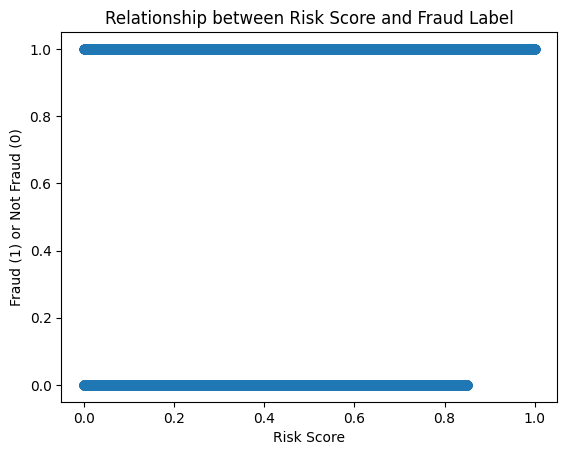

In [ ]:
# visualize relationship between risk score and fraud label
plt.scatter(fraud_df['Risk_Score'], fraud_df['Fraud_Label'])
plt.xlabel('Risk Score')
plt.ylabel('Fraud (1) or Not Fraud (0)')
plt.title('Relationship between Risk Score and Fraud Label')
plt.show()

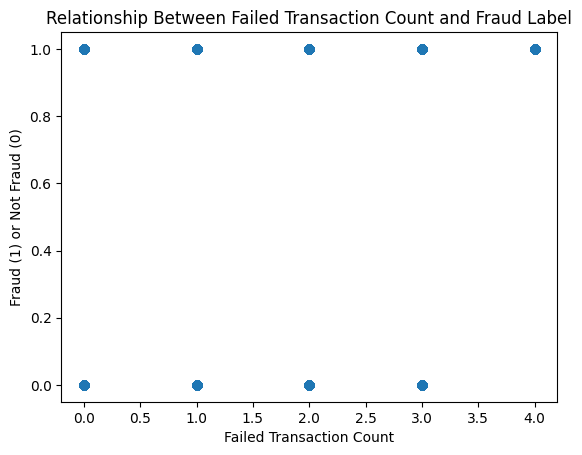

In [ ]:
# visualize relationship between failed transactions and fraud label

plt.scatter(fraud_df['Failed_Transaction_Count_7d'], fraud_df['Fraud_Label'])
plt.xlabel('Failed Transaction Count')
plt.ylabel('Fraud (1) or Not Fraud (0)')
plt.title('Relationship Between Failed Transaction Count and Fraud Label')
plt.show()

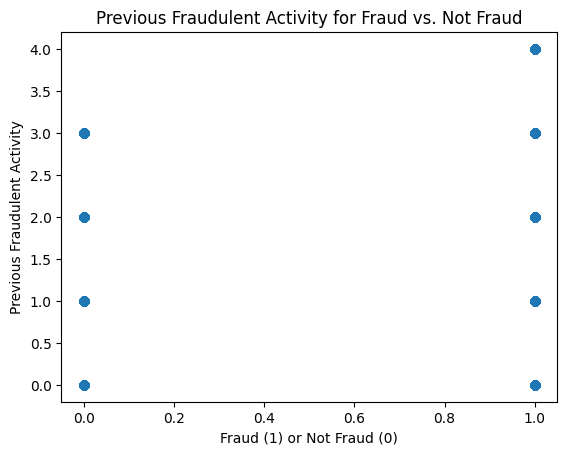

In [ ]:
plt.scatter(fraud_df['Fraud_Label'], fraud_df['Failed_Transaction_Count_7d'])
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Previous Fraudulent Activity')
plt.title('Previous Fraudulent Activity for Fraud vs. Not Fraud')
plt.show()

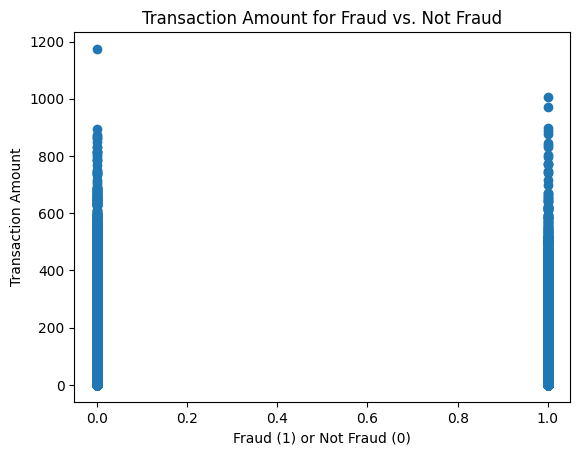

In [ ]:
# visualize the transaction amount for fraudulent vs. not fraudulent
plt.scatter(fraud_df['Fraud_Label'], fraud_df['Transaction_Amount'])
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount for Fraud vs. Not Fraud')
plt.show()

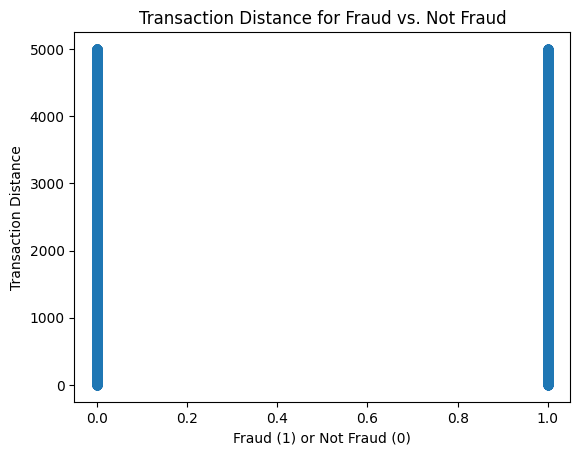

In [ ]:
# visualize the transaction distance for fraud vs. not fraud
plt.scatter(fraud_df['Fraud_Label'], fraud_df['Transaction_Distance'])
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Transaction Distance')
plt.title('Transaction Distance for Fraud vs. Not Fraud')
plt.show()

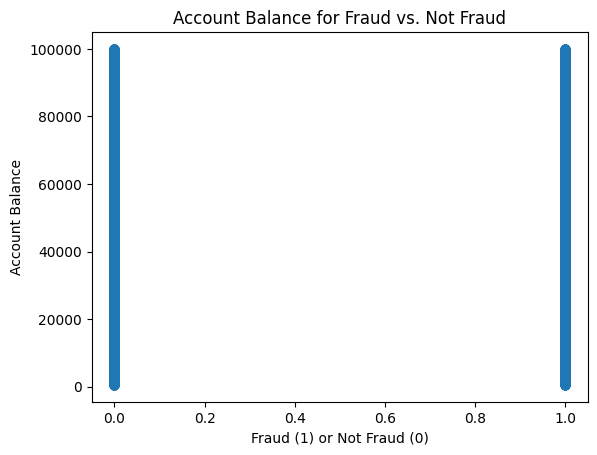

In [ ]:
plt.scatter(fraud_df['Fraud_Label'], fraud_df['Account_Balance'])
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Account Balance')
plt.title('Account Balance for Fraud vs. Not Fraud')
plt.show()

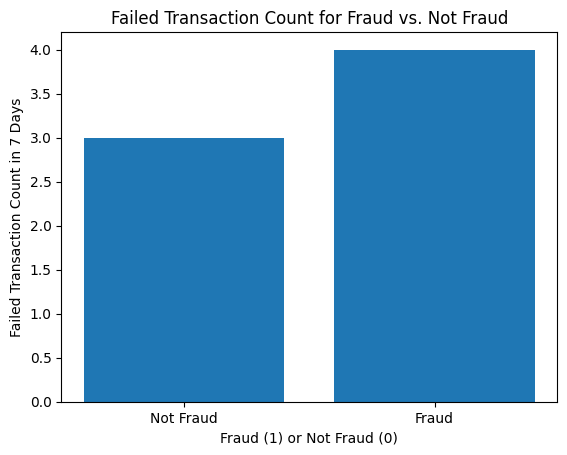

In [ ]:
plt.bar(fraud_df['Fraud_Label'], fraud_df['Failed_Transaction_Count_7d'])
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.xlabel('Fraud (1) or Not Fraud (0)')
plt.ylabel('Failed Transaction Count in 7 Days')
plt.title('Failed Transaction Count for Fraud vs. Not Fraud')
plt.show()

It's hard to tell whether or not a transaction is fraudulent just from risk score or failed transaction count, so I will create a machine learning model to determine whether or not a transaction is fraudulent.

# Creating Machine Learning Model

In [ ]:
# creating independent and dependent variables
x = fraud_df[['Risk_Score', 'Failed_Transaction_Count_7d']]
y = fraud_df['Fraud_Label']

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
x_scaled = scaler.fit_transform(x)

# using RandomUnderSampler to balance the dataset
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x, y)

# splitting data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

#initializing model
model = LogisticRegression()

# training model
model.fit(x_train, y_train)

# making predictions
y_pred = model.predict(x_test)

# evaluating model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.7901042477049945


In [ ]:
y_resampled.value_counts()

# Evaluating Model

In [ ]:
# creating classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3273
           1       0.78      0.80      0.79      3154

    accuracy                           0.79      6427
   macro avg       0.79      0.79      0.79      6427
weighted avg       0.79      0.79      0.79      6427



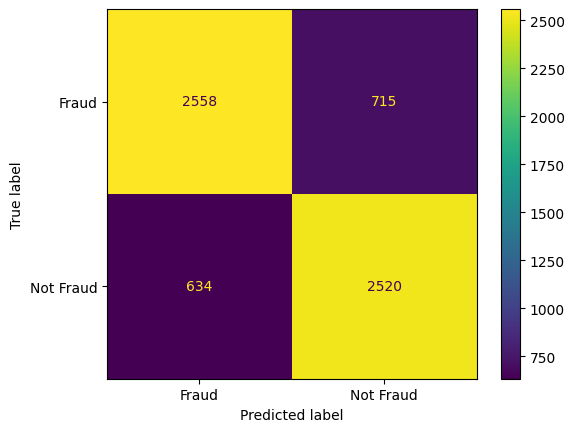

In [ ]:
# creating confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ['Fraud', 'Not Fraud'])

In [ ]:
# showcasing coefficients
print(model.coef_)

[[5.55373136 1.35755803]]


My model was around 79% accurate at determining whether or not a transaction was fraudulent.

# Hypothesis Testing

Null Hypothesis: Failed transaction count and risk score have no effect on determining whether or not a transaction is fraudulent.

Alternative Hypothesis: Failed transaction count and risk score have an effect on determining whether or not a transaction is fraudulent.

In [ ]:
# t-testing risk score and failed transaction count
t_stat, p_val = stats.ttest_ind(fraud_df['Risk_Score'], fraud_df['Failed_Transaction_Count_7d'])
print('risk score vs. failed transaction count')
print('t-statistic:', t_stat)
print(f'p-value: {p_val:.10f}')

# t-testing failed transaction count and fraud label.
t_stat, p_val = stats.ttest_ind(fraud_df['Failed_Transaction_Count_7d'], fraud_df['Fraud_Label'])
print('failed transaction count vs. fraud label')
print('t-statistic:', t_stat)
print(f'p-value: {p_val:.10f}')

# t-testing risk score and fraud label
t_stat, p_val = stats.ttest_ind(fraud_df['Risk_Score'], fraud_df['Fraud_Label'])
print('risk score vs. fraud label')
print('t-statistic:', t_stat)
print(f'p-value: {p_val:.10f}')

# t-testing the data used to create my ml model
#t_stat, p_val = stats.ttest_ind(x_train, x_test)
#print('t-statistic:', t_stat)
#print('p-value:', p_val)

risk score vs. failed transaction count
t-statistic: -232.7060906630539
p-value: 0.0000000000
failed transaction count vs. fraud label
t-statistic: 252.5556839473737
p-value: 0.0000000000
risk score vs. fraud label
t-statistic: 73.46269890872061
p-value: 0.0000000000


I can reject the null hypothesis because the p-value is less than 0.05.

# Conclusion

Failed transaction count and risk score are correlated to whether or not a transaction is fradulent and have an effect on determining whether or not a transaction is fraudulent. Using these two variables, a machine learning model can be created to accurately classify transactions as either fraud or not fraud.